In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv("data.csv")

## Visualization

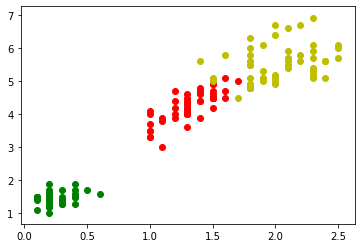

In [29]:
def visualize(df):
    Iris_setosa = df[df['Species']=="Iris-setosa"]
    Iris_versicolor = df[df['Species']=="Iris-versicolor"]
    Iris_virginica = df[df['Species']=="Iris-virginica"]
    plt.scatter(x = Iris_setosa['PetalWidthCm'], y = Iris_setosa['PetalLengthCm'], color="g")
    plt.scatter(x = Iris_versicolor['PetalWidthCm'], y = Iris_versicolor['PetalLengthCm'], color="r")
    plt.scatter(x = Iris_virginica['PetalWidthCm'], y = Iris_virginica['PetalLengthCm'], color="y")
    
visualize(df)
X = df.iloc[:, :2]

## Algorithm

In [59]:
def fit(X, k, loop, eps):
    centers = {}
    init_points = np.random.randint(0, len(X), size=k)
    for i in range(k):
        centers[i] = X.iloc[init_points[i], :].values
    count = 0
    while loop >= count:
        clusters = {i:[] for i in range(k)}
        for x in X.values:
            distance = np.array([np.linalg.norm(x - centers[center]) for center in centers])
            clusters[np.argmin(distance)].append(x)
        before_centers = centers.copy()
        check_eps = False
        for cluster in clusters:
            centers[cluster] = np.mean(clusters[cluster], axis=0)
            if np.abs(centers[cluster] - before_centers[cluster]).all() < eps:
                check_eps = True
        if check_eps:
            break
        count += 1
    return centers
centers = fit(X, 3, 100,0.002)   
centers

{0: array([4.35423729, 1.39152542]),
 1: array([5.7       , 2.08536585]),
 2: array([1.464, 0.244])}

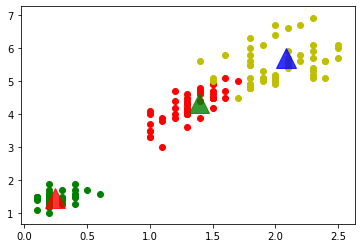

In [68]:
def visualize_result(df, centers):
    visualize(df)
    plt.plot(centers[0][1], centers[0][0], 'g^', markersize = 20, alpha = .8)
    plt.plot(centers[1][1], centers[1][0], 'b^', markersize = 20, alpha = .8)
    plt.plot(centers[2][1], centers[2][0], 'r^', markersize = 20, alpha = .8)
visualize_result(df, centers)

## Library

In [70]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters = 3)
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[4.26923077 1.34230769]
 [1.464      0.244     ]
 [5.59583333 2.0375    ]]


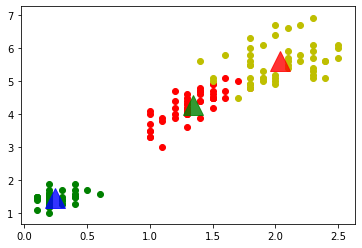

In [76]:
print(clusters.cluster_centers_)
visualize_result(df, clusters.cluster_centers_)

In [82]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters.labels_)
score


0.6602760883241133

## Elbow

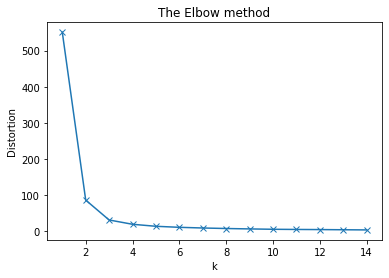

In [83]:
def elbow(X, fixed_k):
    distortions = []
    for k in fixed_k:
        cluster = KMeans(n_clusters=k)
        cluster.fit(X)
        distortions.append(cluster.inertia_)

    plt.plot(fixed_k, distortions, 'x-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow method')

elbow(X, range(1,15))